In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
)
import plotly.express as px

In [21]:
X, y = make_classification(
    n_samples=3000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=4,
    n_clusters_per_class=1,
    random_state=3
)

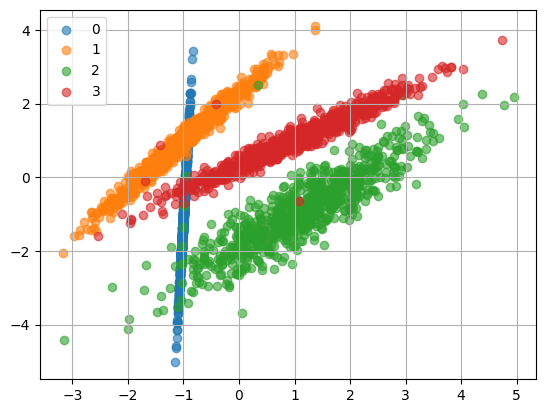

In [22]:
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.6, label=f"{i}")

plt.legend()
plt.grid()
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [87]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

classifier

KNeighborsClassifier()

In [88]:
y_pred = classifier.predict(X_test)

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.934211,0.986486,0.995192,0.979339,0.973333,0.973807,0.974063
recall,0.986111,0.964758,0.971831,0.971311,0.973333,0.973503,0.973333
f1-score,0.959459,0.975501,0.983373,0.975309,0.973333,0.973411,0.973462
support,216.000000,227.000000,213.000000,244.000000,0.973333,900.000000,900.000000


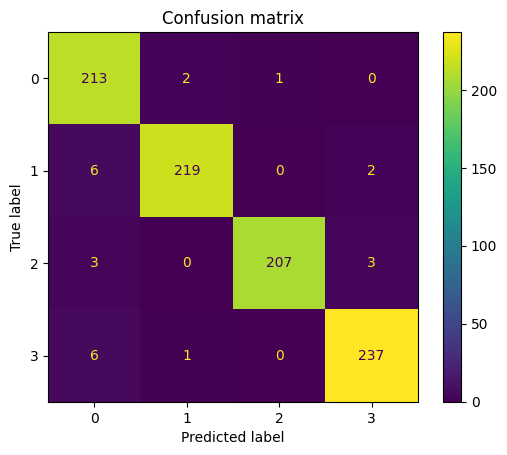

In [90]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion matrix")
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {"n_neighbors": np.arange(1, 20, 2)}

gridSearch = GridSearchCV(
    estimator=classifier,
    param_grid=hyperparameters,
    cv=10
)

gridSearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [92]:
best_params = gridSearch.best_params_
best_params

{'n_neighbors': np.int64(3)}

In [95]:
classifier.set_params(**best_params)

y_pred = classifier.predict(X_test)

In [96]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.938596,0.990868,0.995238,0.987654,0.977778,0.978089,0.978486
recall,0.990741,0.955947,0.981221,0.983607,0.977778,0.977879,0.977778
f1-score,0.963964,0.973094,0.988180,0.985626,0.977778,0.977716,0.977871
support,216.000000,227.000000,213.000000,244.000000,0.977778,900.000000,900.000000


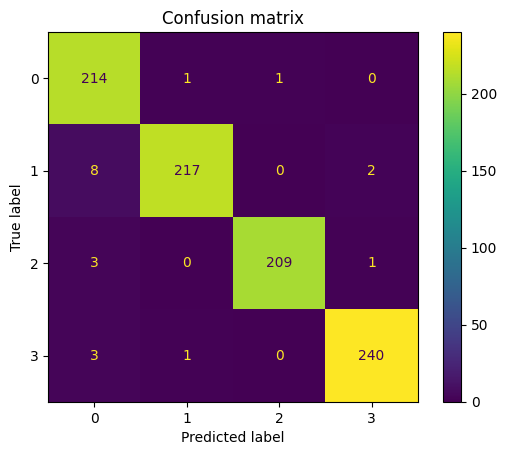

In [97]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion matrix")
plt.show()